In [1]:
import graphs
import policys
import subset_verify
from tqdm.auto import tqdm
import numpy as np

import random
random.seed(12)

# hop plot: varying by nnodes for a fixed hop

In [63]:
ngraph = 20
# nnodes = [50, 75, 100]
nnodes = [55, 70, 85, 100]
hop = 1

In [64]:
Meek_sep = []
Random = []
# Random_subset = []
Coloring = []
Verify = []
Meek_sep_onebyone = []
Meek_sep_onebyone_subset = []
Meek_sep_subset = []
Coloring_subset = []

for n in nnodes:
    
    meek_sep = []
    random = []
#     random_subset = []
    coloring = []
    verify = []
    meek_sep_onebyone = []
    meek_sep_onebyone_subset = []
    meek_sep_subset = []

    coloring_subset = []
    
    for _ in tqdm(range(ngraph)):
        p = graphs.subset_search(nnodes=n, hop=hop)

        I = policys.meek_sep_policy(p, onebyone=False, subset=False)
        meek_sep.append(len(I))

        p.reset()
        I = policys.random_policy(p)
        random.append(len(I))

#         p.reset()
#         I = policys.random_subset_policy(p)
#         random_subset.append(len(I))

        p.reset()
        I = policys.coloring_policy(p, subset=False)
        coloring.append(len(I))

        p.reset()
        verify.append(len(subset_verify.subset_atomic_verification(p.DAG.to_nx(), p.target_edges)[0]))
        
        p.reset()
        I = policys.meek_sep_policy(p, onebyone=True, subset=False)
        meek_sep_onebyone.append(len(I))
        
        p.reset()
        I = policys.meek_sep_policy(p, onebyone=True, subset=True)
        meek_sep_onebyone_subset.append(len(I))
        
        p.reset()
        I = policys.meek_sep_policy(p, onebyone=False, subset=True)
        meek_sep_subset.append(len(I))
        
        p.reset()
        I = policys.coloring_policy(p, subset=True)
        coloring_subset.append(len(I))
        
    Meek_sep.append(meek_sep)
    Random.append(random)
#     Random_subset.append(random_subset)
    Coloring.append(coloring)
    Verify.append(verify)
    Meek_sep_onebyone.append(meek_sep_onebyone)
    Meek_sep_onebyone_subset.append(meek_sep_onebyone_subset)
    Meek_sep_subset.append(meek_sep_subset)
    
    Coloring_subset.append(coloring_subset)

  0%|          | 0/20 [00:00<?, ?it/s]

/home/jzhang/miniconda3/envs/dag/lib/python3.11/site-packages/graphical_models/custom_types.py:13: UserWarning: [Need name!] still needs to be tested. If you intend to use this method, please submit a pull request.
  warn(s)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

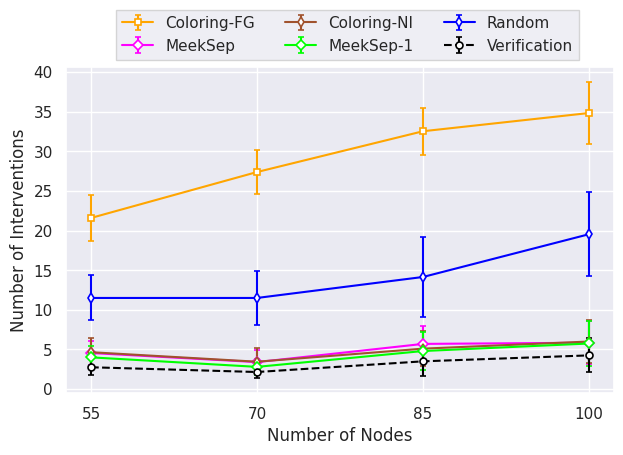

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# fig, ax = plt.subplots(1,1,figsize=(4,3))
# plt.rcParams.update({'font.size': 6})
# plt.grid(True)
plt.errorbar(nnodes, np.mean(Coloring, axis=1), 0.5*np.std(Coloring, axis=1), label='Coloring-FG',
            marker='s', mfc='white', ms=5, mew=1.2, capsize=2, color='orange')
plt.errorbar(nnodes, np.mean(Meek_sep, axis=1), 0.5*np.std(Meek_sep, axis=1), label='MeekSep',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='magenta')
plt.errorbar(nnodes, np.mean(Coloring_subset, axis=1), 0.5*np.std(Coloring_subset, axis=1), label='Coloring-NI',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='sienna')
plt.errorbar(nnodes, np.mean(Meek_sep_onebyone, axis=1), 0.5*np.std(Meek_sep_onebyone, axis=1), label='MeekSep-1',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='lime')
plt.errorbar(nnodes, np.mean(Random, axis=1), 0.5*np.std(Random, axis=1), label='Random',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='blue')
plt.errorbar(nnodes, np.mean(Verify, axis=1), 0.5*np.std(Verify, axis=1), label='Verification', linestyle='--',
             marker='o', mfc='white', ms=5, mew=1.2, capsize=2, color='black')

plt.xticks(nnodes)
# plt.errorbar(nnodes, np.mean(Meek_sep_onebyone_subset, axis=1), 0.5*np.std(Meek_sep_onebyone_subset, axis=1), label='meek sep onebyone subset')
# plt.errorbar(nnodes, np.mean(Meek_sep_subset, axis=1), 0.5*np.std(Meek_sep_subset, axis=1), label='meek sep subset')


plt.xlabel('Number of Nodes')
plt.ylabel('Number of Interventions')

plt.legend(bbox_to_anchor=(.95, 1.2),
          fancybox=False, shadow=False, ncol=3)
plt.tight_layout()

plt.savefig(f'./results/hop_{hop}.pdf')

# nnode plot: varying by hop for a fixed number of nodes

In [76]:
ngraph = 20
nnode = 150
hops = [1,2,3,4,5]

In [77]:
Meek_sep = []
Random = []
Random_subset = []
Coloring = []
Verify = []
Meek_sep_onebyone = []
Meek_sep_onebyone_subset = []
Meek_sep_subset = []

for hop in hops:
    
    meek_sep = []
    random = []
    random_subset = []
    coloring = []
    verify = []
    meek_sep_onebyone = []
    meek_sep_onebyone_subset = []
    meek_sep_subset = []

    for _ in tqdm(range(ngraph)):
        p = graphs.subset_search(nnodes=nnode, hop=hop)

        I = policys.meek_sep_policy(p, onebyone=False, subset=False)
        meek_sep.append(len(I))

        p.reset()
        I = policys.random_policy(p)
        random.append(len(I))

        p.reset()
        I = policys.coloring_policy(p, subset=True)
        random_subset.append(len(I))

        p.reset()
        I = policys.coloring_policy(p, subset=False)
        coloring.append(len(I))

        p.reset()
        verify.append(len(subset_verify.subset_atomic_verification(p.DAG.to_nx(), p.target_edges)[0]))
        
        p.reset()
        I = policys.meek_sep_policy(p, onebyone=True, subset=False)
        meek_sep_onebyone.append(len(I))
        
        p.reset()
        I = policys.meek_sep_policy(p, onebyone=True, subset=True)
        meek_sep_onebyone_subset.append(len(I))
        
        p.reset()
        I = policys.meek_sep_policy(p, onebyone=False, subset=True)
        meek_sep_subset.append(len(I))
        
    Meek_sep.append(meek_sep)
    Random.append(random)
    Random_subset.append(random_subset)
    Coloring.append(coloring)
    Verify.append(verify)
    Meek_sep_onebyone.append(meek_sep_onebyone)
    Meek_sep_onebyone_subset.append(meek_sep_onebyone_subset)
    Meek_sep_subset.append(meek_sep_subset)

  0%|          | 0/20 [00:00<?, ?it/s]

/home/jzhang/miniconda3/envs/dag/lib/python3.11/site-packages/graphical_models/custom_types.py:13: UserWarning: [Need name!] still needs to be tested. If you intend to use this method, please submit a pull request.
  warn(s)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

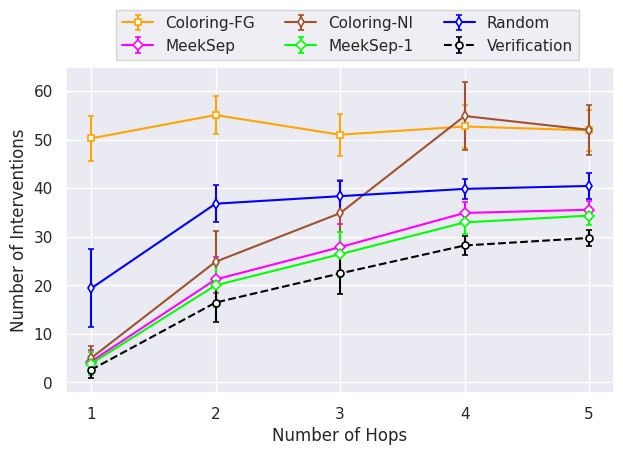

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# fig, ax = plt.subplots(1,1,figsize=(4,3))
# plt.rcParams.update({'font.size': 6})
# plt.grid(True)
plt.errorbar(hops, np.mean(Coloring, axis=1), 0.5*np.std(Coloring, axis=1), label='Coloring-FG',
            marker='s', mfc='white', ms=5, mew=1.2, capsize=2, color='orange')
plt.errorbar(hops, np.mean(Meek_sep, axis=1), 0.5*np.std(Meek_sep, axis=1), label='MeekSep',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='magenta')
plt.errorbar(hops, np.mean(Random_subset, axis=1), 0.5*np.std(Random_subset, axis=1), label='Coloring-NI',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='sienna')
plt.errorbar(hops, np.mean(Meek_sep_onebyone, axis=1), 0.5*np.std(Meek_sep_onebyone, axis=1), label='MeekSep-1',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='lime')
plt.errorbar(hops, np.mean(Random, axis=1), 0.5*np.std(Random, axis=1), label='Random',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='blue')
plt.errorbar(hops, np.mean(Verify, axis=1), 0.5*np.std(Verify, axis=1), label='Verification', linestyle='--',
             marker='o', mfc='white', ms=5, mew=1.2, capsize=2, color='black')

plt.xticks(hops)


plt.xlabel('Number of Hops')
plt.ylabel('Number of Interventions')

plt.legend(bbox_to_anchor=(.95, 1.2),
          fancybox=False, shadow=False, ncol=3)
plt.tight_layout()

plt.savefig(f'./results/nnode_{nnode}.pdf')